In [1]:
from random import randint, choice
import random import *
from statistics import mean
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import uniform

class Chromosome:
    def __init__(self, param=None):
        self.param = param
        self.repres = [self.random_value() for _ in range(param['noDim'])]
        self.fitness = 0.0

    def random_value(self):
        return randint(self.param['min'], self.param['max'])

    def crossover(self, other):
        r = randint(0, len(self.repres) - 1)
        new_repres = self.repres[:r] + other.repres[r:]
        offspring = Chromosome(self.param)
        offspring.repres = new_repres
        return offspring

    def mutation(self):
        pos = randint(0, len(self.repres) - 1)
        self.repres[pos] = self.random_value()
        self.fitness = self.calculate_fitness()

    def calculate_fitness(self):
        return self.param['function'](self.repres, self.param['net'])

    def __str__(self):
        return f'Chromosome: {self.repres}, fitness: {self.fitness}'

    def __repr__(self):
        return str(self)

    def __eq__(self, other):
        return self.repres == other.repres and self.fitness == other.fitness


In [40]:
def read_network_from_gml(file_path):
    graph = nx.read_gml(file_path, label="id")
    adj_matrix = nx.adjacency_matrix(graph).todense().tolist()
    degrees = [degree[1] for degree in graph.degree()]

    network = {
        'noNodes': len(graph.nodes),
        'mat': adj_matrix,
        'noEdges': len(graph.edges),
        'degrees': degrees
    }

    return network




def plot_network(net, com=None, node_size=20, edge_alpha=0.1):
    if com is None:
        com = [1] * net['noNodes']
    np.random.seed(123)
    A = np.matrix(net["mat"])
    G = nx.from_numpy_matrix(A)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots(figsize=(5, 5))
    nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.cool, node_color=com, ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=edge_alpha, ax=ax)
    plt.show()


def modularity(communities, param):
    noNodes = param['noNodes']
    mat = param['mat']
    degrees = param['degrees']
    noEdges = param['noEdges']
    M = 2 * noEdges
    Q = 0.0
    for i in range(0, noNodes):
        for j in range(0, noNodes):
            if communities[i] == communities[j]:
                Q += (mat[i][j] - degrees[i] * degrees[j] / M)
    return Q * 1 / M



def solution(network, no_communities):
    problem_parameters = {
        "min": 1,
        "max": no_communities,
        "noDim": network["noNodes"],
        "net": network,
        "function": modularity
    }
    no_chromosomes = network["noNodes"]
    chromosomes = [Chromosome(problem_parameters) for _ in range(no_chromosomes)]

    for ch in chromosomes:
        ch.fitness = problem_parameters["function"](ch.repres, network)

    generations = 200
    average_values = []
    minimum_values = []
    maximum_values = []
    y_points = []
    for i in range(generations):
        init_len = len(chromosomes)
        for _ in range(init_len):
            a = random.randint(0, init_len - 1)
            b = random.randint(0, init_len - 1)
            ch = chromosomes[a].crossover(chromosomes[b])
            chromosomes.append(ch)

        for ch in chromosomes:
            ch.mutation()

        chroms = [x.fitness for x in chromosomes]
        ch_max = max(chromosomes, key=lambda x: x.fitness)
        ch_min = min(chromosomes, key=lambda x: x.fitness)
        ch_avg = mean(chroms)

        y_points.append(i)
        maximum_values.append(ch_max.fitness)
        average_values.append(ch_avg)

        chromosomes = sorted(chromosomes, key=lambda x: x.fitness, reverse=True)[:init_len]

    plt.plot(y_points, average_values, label="Average")
    plt.plot(y_points, maximum_values, label="Maximum")
    plt.legend()
    plt.show()

    ch = max(chromosomes, key=lambda x: x.fitness)
    plot_network(network, ch.repres)



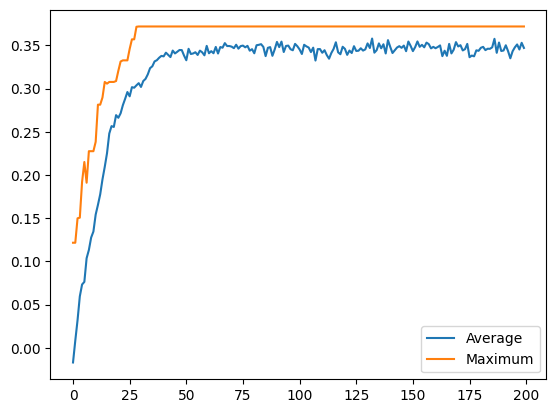

AttributeError: module 'networkx' has no attribute 'from_numpy_matrix'

In [42]:

G = read_network_from_gml("karate.gml")
solution(G, 2)